In [1]:
from tensorflow.keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt

(x_train, _), (x_test, _) = cifar10.load_data()

# x_train = x_train.astype('float32') / 255.
# x_test = x_test.astype('float32') / 255.
# x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
# x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

# noise_factor = 0.1
# x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
# x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

# x_train_noisy = np.clip(x_train_noisy, 0., 1.)
# x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# x_train = x_train.astype('float32') / 255.
# x_test = x_test.astype('float32') / 255.

# x_train = x_train.astype('float32')
# x_test = x_test.astype('float32')

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [1]:
import pickle

pickle_in = open("model-features/cbir-resnet-features.pickle", "rb")
features = pickle.load(pickle_in)

pickle_in = open("model-features/cbir-resnet-features-test.pickle", "rb")
features_test = pickle.load(pickle_in)

print (features.shape)
print (features_test.shape)

(50000, 10)
(10000, 10)


In [2]:
from tensorflow.keras.layers import GaussianNoise
import random
idx = random.randrange(10000)
sample = GaussianNoise(0.08)
# img = x_test.astype(np.float32) / 255

features = sample(features,training=True)
features_test = sample(features_test,training=True)
# noisey_img = noisey.astype(np.uint8)


INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


TypeError: Invalid shape (10,) for image data

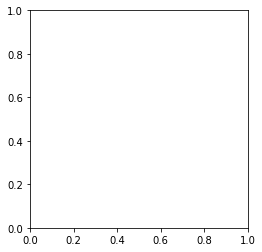

In [4]:
import matplotlib.pyplot as plt
# plt.subplot(1,2,1)
plt.imshow(features[idx])
# plt.title('Original image')
# plt.subplot(1,2,2)
# plt.imshow(x_test_noise[idx])
# plt.title('Image with noise')
# plt.show()

In [3]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model, load_model
from tensorflow.keras import optimizers

input_dim = 10
encoding_dim = 32
opt = optimizers.Adam(lr=0.0001)

input_layer = Input(shape=(input_dim,))
encoder_output = Dense(encoding_dim, activation='relu') (input_layer)
encoder_model = Model(input_layer, encoder_output)
decoder_output = Dense(input_dim, activation='sigmoid') (encoder_output)
model = Model(input_layer, decoder_output)
model.compile(optimizer='adadelta', loss='binary_crossentropy')

/home/softdev/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [4]:
history = model.fit(features, features, epochs=100, batch_size=16, shuffle=True,validation_data=(features_test, features_test))

Epoch 1/100
3125/3125 [==============================] - 3s 938us/step - loss: 0.7142 - val_loss: 0.7043
Epoch 2/100
3125/3125 [==============================] - 3s 903us/step - loss: 0.7019 - val_loss: 0.6912
Epoch 3/100
3125/3125 [==============================] - 3s 916us/step - loss: 0.6884 - val_loss: 0.6779
Epoch 4/100
3125/3125 [==============================] - 3s 918us/step - loss: 0.6749 - val_loss: 0.6647
Epoch 5/100
3125/3125 [==============================] - 3s 911us/step - loss: 0.6612 - val_loss: 0.6517
Epoch 6/100
3125/3125 [==============================] - 3s 901us/step - loss: 0.6479 - val_loss: 0.6388
Epoch 7/100
3125/3125 [==============================] - 3s 923us/step - loss: 0.6348 - val_loss: 0.6259
Epoch 8/100
3125/3125 [==============================] - 3s 925us/step - loss: 0.6215 - val_loss: 0.6130
Epoch 9/100
3125/3125 [==============================] - 3s 916us/step - loss: 0.6084 - val_loss: 0.6001
Epoch 10/100
3125/3125 [==============================]

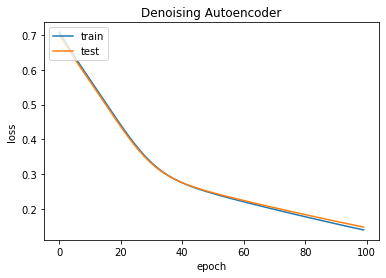

In [6]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Denoising Autoencoder')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [8]:
encoder_model.save('model-ae/denoising-ae-encoder.h5')
model.save('model-ae/denoising-ae-decoder.h5')
print ("Model Saved!")

Model Saved!
